In [ ]:
# importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# importing the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Major/Dataset/train'
valid_path = '/content/drive/MyDrive/Major/Dataset/test'

In [ ]:
# Importing the Inception V3 library and adding preprocessing layer to the front of VGG
# Using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87924736/87910968 [==============================] - 4s 0us/step


In [ ]:
# Existing weights are not trained
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# To find number of output classes
folders = glob('/content/drive/MyDrive/Major/Dataset/train/*')

In [ ]:
len(folders)

50

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# Creating a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# Structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# Cost and optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Major/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 500 images belonging to 50 classes.


In [ ]:
len(training_set)

16

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Major/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 250 images belonging to 50 classes.


In [ ]:
len(test_set)

8

In [ ]:
# fitting the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
16/16 [==============================] - 440s 27s/step - loss: 26.1016 - accuracy: 0.2000 - val_loss: 19.5946 - val_accuracy: 0.2800
Epoch 2/10
16/16 [==============================] - 14s 885ms/step - loss: 7.9277 - accuracy: 0.5620 - val_loss: 5.4747 - val_accuracy: 0.6760
Epoch 3/10
16/16 [==============================] - 14s 880ms/step - loss: 2.3599 - accuracy: 0.7760 - val_loss: 1.6282 - val_accuracy: 0.8600
Epoch 4/10
16/16 [==============================] - 14s 903ms/step - loss: 0.6604 - accuracy: 0.9100 - val_loss: 1.2326 - val_accuracy: 0.9040
Epoch 5/10
16/16 [==============================] - 14s 879ms/step - loss: 0.3303 - accuracy: 0.9360 - val_loss: 0.5878 - val_accuracy: 0.9520
Epoch 6/10
16/16 [==============================] - 14s 885ms/step - loss: 0.3166 - accuracy: 0.9660 - val_loss: 0.9900 - val_accuracy: 0.9360
Epoch 7/10
16/16 [==============================] - 14s 884ms/step - loss: 0.3739 - accuracy: 0.9520 - val_loss: 0.5200 - val_accuracy: 0.924

In [ ]:
import matplotlib.pyplot as plt

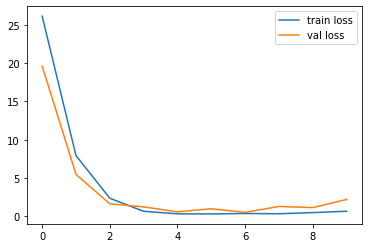

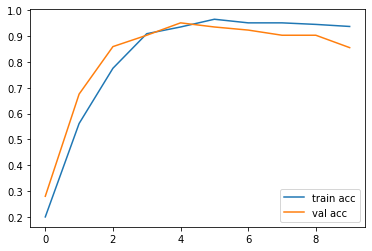

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# saving it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
#saving it to drive

!mkdir -p /content/drive/MyDrive/Major/saved_model
model.save('/content/drive/MyDrive/Major/saved_model/my_model') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Major/saved_model/my_model/assets


In [ ]:
#loading our trained model
from keras.models import load_model
model_path = '/content/drive/MyDrive/Major/saved_model/my_model'
model = load_model(model_path)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
#creating a dictionary of classes
class_dict = {
    's01' : 0,
    's02' : 1,
    's03' : 2,
    's04' : 3,
    's05' : 4,
    's06' : 5,
    's07' : 6,
    's08' : 7,
    's09' : 8,
    's10' : 9,
    's11' : 10,
    's12' : 11,
    's13' : 12,
    's14' : 13,
    's15' : 14,
    's16' : 15,
    's17' : 16,
    's18' : 17,
    's19' : 18,
    's20' : 19,
    's21' : 20,
    's22' : 21,
    's23' : 22,
    's24' : 23,
    's25' : 24,
    's26' : 25,
    's27' : 26,
    's28' : 27,
    's29' : 28,
    's30' : 29,
    's31' : 30,
    's32' : 31,
    's33' : 32,
    's34' : 33,
    's35' : 34,
    's36' : 35,
    's37' : 36,
    's38' : 37,
    's39' : 38,
    's40' : 39,
    's41' : 40,
    's42' : 41,
    's43' : 42,
    's44' : 43,
    's45' : 44,
    's46' : 45,
    's47' : 46,
    's48' : 47,
    's49' : 48,
    's50' : 49,
}
class_names = list(class_dict.keys())

In [ ]:
#Setting the dimensions
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# dimensions of our images
img_width, img_height = 224, 224
images_dir = '/content/drive/MyDrive/Major/Dataset/test'

{'Class': 's18', 'Probability': 1.0}


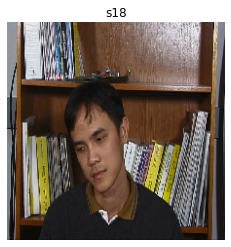

In [ ]:
# Predicting the image
image_path = '/content/drive/MyDrive/Major/Dataset/test/s18/11.jpg'
new_img = image.load_img(image_path, target_size=(img_width, img_height))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255


img_prob = model.predict(img) #returns numpy array of class probabilities
prediction_prob = img_prob.max() #getting max proabability
classname=img_prob.argmax() #getting the classname

pred_dict = {"Class":class_names[classname], "Probability":prediction_prob}
print(pred_dict)

#plotting image with predicted class name

plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_names[classname])
plt.show()

{'Class': 's25', 'Probability': 1.0}


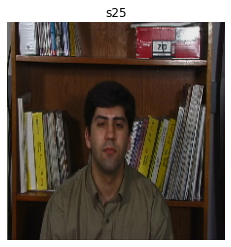

In [ ]:
# Predicting another image
image_path = '/content/drive/MyDrive/Major/Dataset/test/s25/15.jpg'
new_img = image.load_img(image_path, target_size=(img_width, img_height))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

img_prob = model.predict(img) #returns numpy array of class probabilities
prediction_prob = img_prob.max() #getting max proabability
classname=img_prob.argmax() #getting the classname

pred_dict = {"Class":class_names[classname], "Probability":prediction_prob}
print(pred_dict)

#plotting image with predicted class name

plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_names[classname])
plt.show()